In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

In [ ]:
review=pd.read_csv("/content/drive/MyDrive/txt_review.csv",index_col=False)
review.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B0026RQTGE,AMATOIG271SMX,sunflower,6,6,5,1267660800,So Happy to find this vendor!!!,This is a fantastic deal!! My dogs love green...
1,1,B004HOLD92,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1329609600,Great Spicy Snack - Highly Recommended,The Blue Diamond Jalapeno Smokehouse Almonds ...
2,2,B000NGQ9VK,A595T15OO91DC,"A. Ort ""aorto""",0,0,5,1300579200,It's about the caffeine!,"240 MG of caffeine, no sugar crash, no calori..."
3,3,B000CQIDK6,A3DRH7AR0ZNOJ3,Joshua Barber,0,0,5,1317254400,Delisious,A fantastic blend. Also tastes quite good bre...
4,4,B007PA30ZU,A86BBGM0BWI3L,M. Collier,1,1,5,1168300800,great if you can get it,This is the BEST coffee for the Keurig coffee...


In [ ]:
review.rename(columns={'0':"ProductId",'1':"UserId",'2':"ProfileName",'3':"HelpfulnessNumerator",'4':'HelpfulnessDenominator','5':'Score','6':'Time','7':'ReviewSummary','8':'ReviewText','Unnamed: 0':'ID'},inplace=True)

In [ ]:
review

,ID,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B0026RQTGE,AMATOIG271SMX,sunflower,6,6,5,1267660800,So Happy to find this vendor!!!,This is a fantastic deal!! My dogs love green...
1,1,B004HOLD92,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1329609600,Great Spicy Snack - Highly Recommended,The Blue Diamond Jalapeno Smokehouse Almonds ...
2,2,B000NGQ9VK,A595T15OO91DC,"A. Ort ""aorto""",0,0,5,1300579200,It's about the caffeine!,"240 MG of caffeine, no sugar crash, no calori..."
3,3,B000CQIDK6,A3DRH7AR0ZNOJ3,Joshua Barber,0,0,5,1317254400,Delisious,A fantastic blend. Also tastes quite good bre...
4,4,B007PA30ZU,A86BBGM0BWI3L,M. Collier,1,1,5,1168300800,great if you can get it,This is the BEST coffee for the Keurig coffee...
...,...,...,...,...,...,...,...,...,...,...
568449,568449,B006N3I29E,AROXIIN9HP7NR,K. Grove,2,3,5,1258675200,Great taste.,This is very good coffee. I don't like strong...
568450,568450,B004DXBBU8,A1KRRXW5SXE5GH,"Jeffrey A. Hanen ""JeffWeHo""",0,0,4,1323216000,Not too bad!,"Put some in a pan, mix with some coconut milk..."
568451,568451,B003POD8O8,A32H9CF9TG0Z7K,magfl,2,2,4,1325894400,kids were thrilled,"I brought this for 2 of my grandkids, ages 10..."
568452,568452,B000RIBOUA,A2Q929IPT0Q6IO,J. Avital,1,1,5,1340496000,Great coffee,I tried about twenty brands and different roa...


In [ ]:
review.set_index("ID",inplace=True)

In [ ]:
review

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
ID,,,,,,,,,
0,B0026RQTGE,AMATOIG271SMX,sunflower,6,6,5,1267660800,So Happy to find this vendor!!!,This is a fantastic deal!! My dogs love green...
1,B004HOLD92,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1329609600,Great Spicy Snack - Highly Recommended,The Blue Diamond Jalapeno Smokehouse Almonds ...
2,B000NGQ9VK,A595T15OO91DC,"A. Ort ""aorto""",0,0,5,1300579200,It's about the caffeine!,"240 MG of caffeine, no sugar crash, no calori..."
3,B000CQIDK6,A3DRH7AR0ZNOJ3,Joshua Barber,0,0,5,1317254400,Delisious,A fantastic blend. Also tastes quite good bre...
4,B007PA30ZU,A86BBGM0BWI3L,M. Collier,1,1,5,1168300800,great if you can get it,This is the BEST coffee for the Keurig coffee...
...,...,...,...,...,...,...,...,...,...
568449,B006N3I29E,AROXIIN9HP7NR,K. Grove,2,3,5,1258675200,Great taste.,This is very good coffee. I don't like strong...
568450,B004DXBBU8,A1KRRXW5SXE5GH,"Jeffrey A. Hanen ""JeffWeHo""",0,0,4,1323216000,Not too bad!,"Put some in a pan, mix with some coconut milk..."
568451,B003POD8O8,A32H9CF9TG0Z7K,magfl,2,2,4,1325894400,kids were thrilled,"I brought this for 2 of my grandkids, ages 10..."


In [ ]:
review

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
ID,,,,,,,,,
0,B0026RQTGE,AMATOIG271SMX,sunflower,6,6,5,1267660800,So Happy to find this vendor!!!,This is a fantastic deal!! My dogs love green...
1,B004HOLD92,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1329609600,Great Spicy Snack - Highly Recommended,The Blue Diamond Jalapeno Smokehouse Almonds ...
2,B000NGQ9VK,A595T15OO91DC,"A. Ort ""aorto""",0,0,5,1300579200,It's about the caffeine!,"240 MG of caffeine, no sugar crash, no calori..."
3,B000CQIDK6,A3DRH7AR0ZNOJ3,Joshua Barber,0,0,5,1317254400,Delisious,A fantastic blend. Also tastes quite good bre...
4,B007PA30ZU,A86BBGM0BWI3L,M. Collier,1,1,5,1168300800,great if you can get it,This is the BEST coffee for the Keurig coffee...
...,...,...,...,...,...,...,...,...,...
568449,B006N3I29E,AROXIIN9HP7NR,K. Grove,2,3,5,1258675200,Great taste.,This is very good coffee. I don't like strong...
568450,B004DXBBU8,A1KRRXW5SXE5GH,"Jeffrey A. Hanen ""JeffWeHo""",0,0,4,1323216000,Not too bad!,"Put some in a pan, mix with some coconut milk..."
568451,B003POD8O8,A32H9CF9TG0Z7K,magfl,2,2,4,1325894400,kids were thrilled,"I brought this for 2 of my grandkids, ages 10..."


In [ ]:
review["ReviewSummary"]=review["ReviewSummary"].apply(lambda x:x.replace('ReviewSummary:',""))
review["ReviewSummary"]=review["ReviewSummary"].apply(lambda x:x.replace('\n',""))

In [ ]:
review["ReviewText"]=review["ReviewText"].apply(lambda x:x.replace('ReviewText:',""))
review["ReviewText"]=review["ReviewText"].apply(lambda x:x.replace('\n',""))

In [ ]:
reviews = review.drop_duplicates()

In [ ]:
reviews.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
ID,,,,,,,,,
0,B0026RQTGE,AMATOIG271SMX,sunflower,6,6,5,1267660800,So Happy to find this vendor!!!,This is a fantastic deal!! My dogs love green...
1,B004HOLD92,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1329609600,Great Spicy Snack - Highly Recommended,The Blue Diamond Jalapeno Smokehouse Almonds ...
2,B000NGQ9VK,A595T15OO91DC,"A. Ort ""aorto""",0,0,5,1300579200,It's about the caffeine!,"240 MG of caffeine, no sugar crash, no calori..."
3,B000CQIDK6,A3DRH7AR0ZNOJ3,Joshua Barber,0,0,5,1317254400,Delisious,A fantastic blend. Also tastes quite good bre...
4,B007PA30ZU,A86BBGM0BWI3L,M. Collier,1,1,5,1168300800,great if you can get it,This is the BEST coffee for the Keurig coffee...


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568167 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568167 non-null  object
 1   UserId                  568167 non-null  object
 2   ProfileName             568167 non-null  object
 3   HelpfulnessNumerator    568167 non-null  int64 
 4   HelpfulnessDenominator  568167 non-null  int64 
 5   Score                   568167 non-null  int64 
 6   Time                    568167 non-null  int64 
 7   ReviewSummary           568167 non-null  object
 8   ReviewText              568167 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.3+ MB


In [ ]:
senti=[]
for i in reviews.Score:
    if i>3:
        senti.append("positive")
    elif i<3:
        senti.append("negative")
    else:
        senti.append("cannot_say")

In [ ]:
reviews["Sentiment"]=senti

In [ ]:
pos_review= reviews[reviews["Sentiment"]=="positive"]

In [ ]:
neg_review= reviews[reviews["Sentiment"]=="negative"]

In [ ]:
review.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
ID,,,,,,,,,
0,B0026RQTGE,AMATOIG271SMX,sunflower,6,6,5,1267660800,So Happy to find this vendor!!!,This is a fantastic deal!! My dogs love green...
1,B004HOLD92,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1329609600,Great Spicy Snack - Highly Recommended,The Blue Diamond Jalapeno Smokehouse Almonds ...
2,B000NGQ9VK,A595T15OO91DC,"A. Ort ""aorto""",0,0,5,1300579200,It's about the caffeine!,"240 MG of caffeine, no sugar crash, no calori..."
3,B000CQIDK6,A3DRH7AR0ZNOJ3,Joshua Barber,0,0,5,1317254400,Delisious,A fantastic blend. Also tastes quite good bre...
4,B007PA30ZU,A86BBGM0BWI3L,M. Collier,1,1,5,1168300800,great if you can get it,This is the BEST coffee for the Keurig coffee...


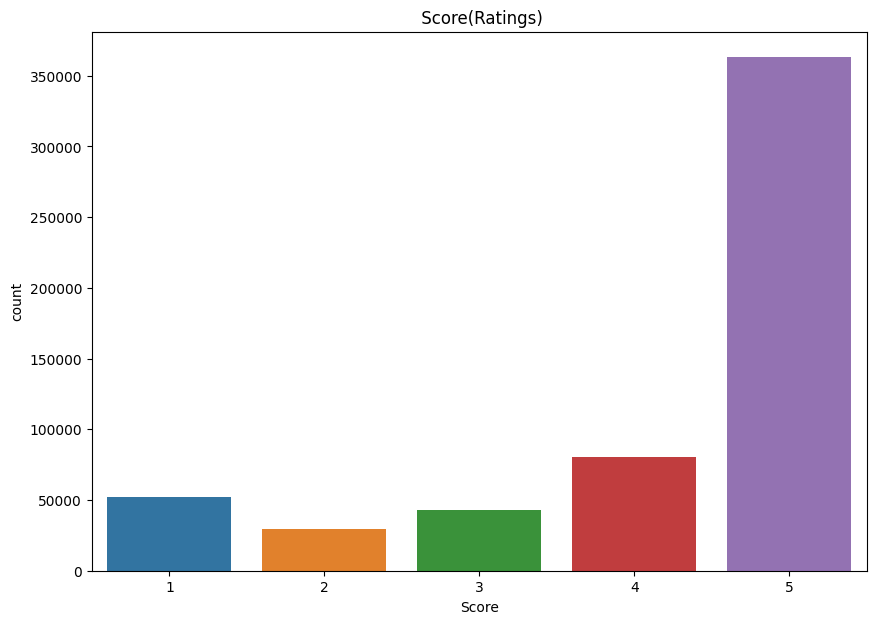

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Score',data=reviews)
plt.title(' Score(Ratings)')
plt.show()

In [ ]:
stopwords1=set(STOPWORDS)

100%|██████████| 443557/443557 [00:01<00:00, 423871.64it/s]


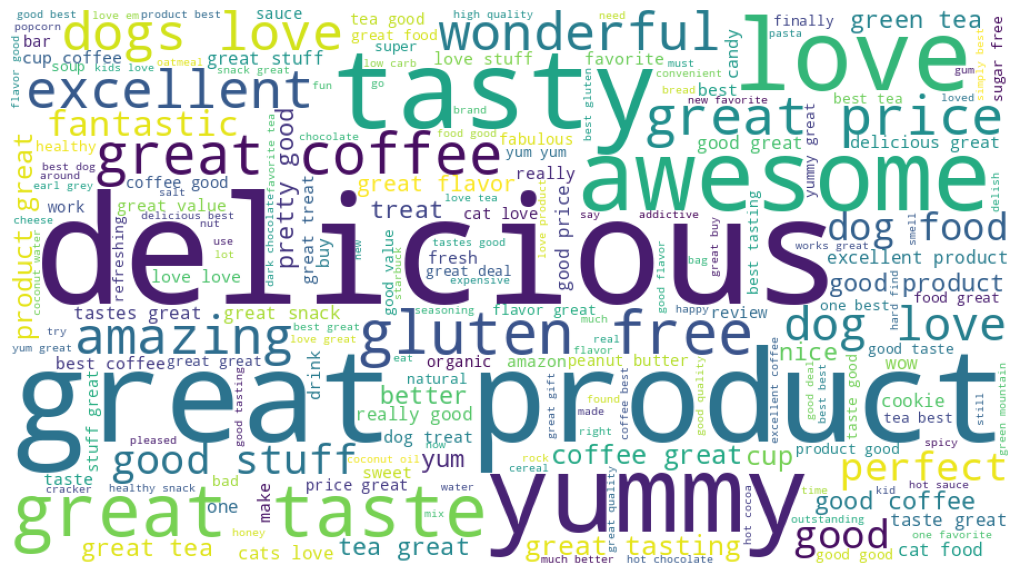

In [ ]:
words_corpus_pos = ''
for val in tqdm(pos_review['ReviewSummary']):
    text = str(val).lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords1]
    words_corpus_pos += ' '.join(tokens) + " "

wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                min_font_size = 10).generate(words_corpus_pos)

plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

100%|██████████| 81996/81996 [00:00<00:00, 483494.14it/s]


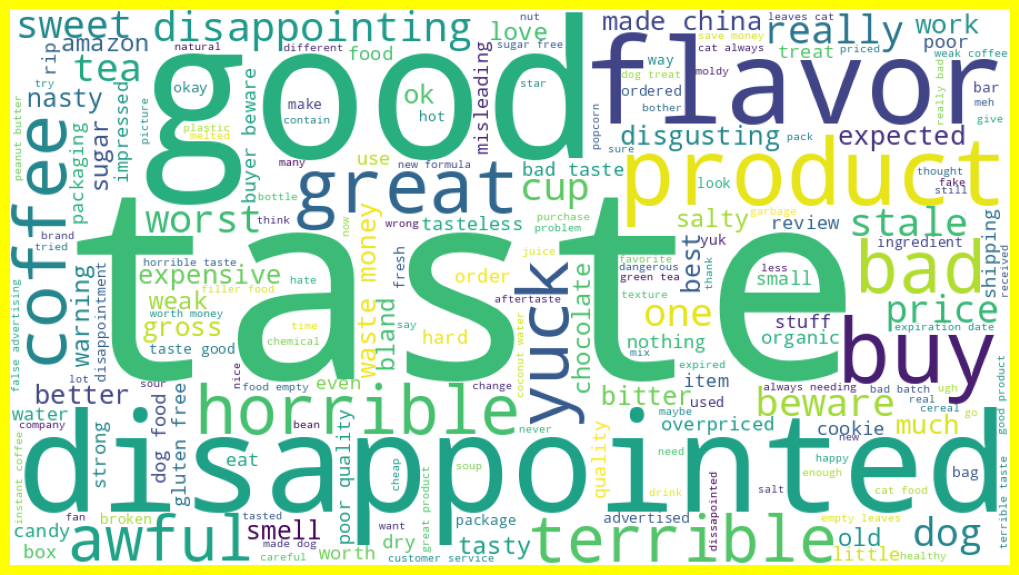

In [ ]:
words_corpus_neg = ''
for val in tqdm(neg_review['ReviewSummary']):
    text = str(val).lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords1]
    words_corpus_neg += ' '.join(tokens) + " "

wordcloud = WordCloud(width = 900, height = 500,
                background_color ='white',
                min_font_size = 10).generate(words_corpus_neg)

plt.figure(figsize = (10, 8), facecolor = 'yellow')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
reviews['usefulness'] = reviews['HelpfulnessNumerator']/reviews['HelpfulnessDenominator']

In [ ]:
usefulness = []
for i in reviews['usefulness']:
    if i > 0.75:
        usefulness.append(">75%")
    elif i < 0.25:
        usefulness.append("<25%")
    elif i >= 0.25 and i <= 0.75:
        usefulness.append("25-75%")
    else:
        usefulness.append("useless")
reviews['usefulness']  = usefulness

In [ ]:
word_count = []
for i in reviews['ReviewText']:
    word_count.append(len(i.split()))
reviews['word_count'] = word_count

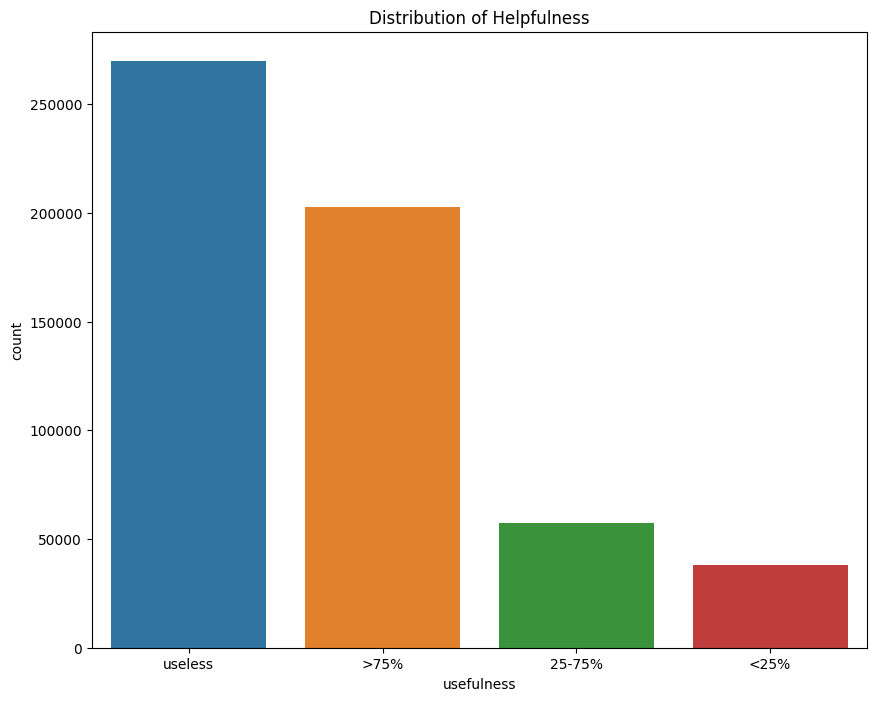

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='usefulness',data=reviews,order=['useless','>75%','25-75%','<25%'])
plt.title('Distribution of Helpfulness')
plt.show()

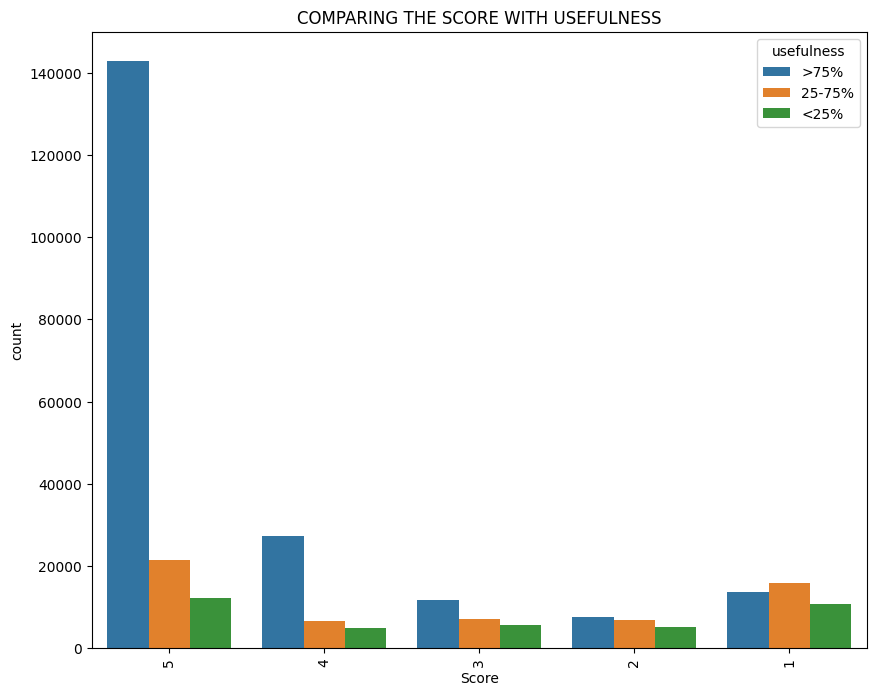

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Score',data=reviews,hue='usefulness',hue_order=['>75%','25-75%','<25%'],order=[5,4,3,2,1])
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SCORE WITH USEFULNESS')
plt.show()

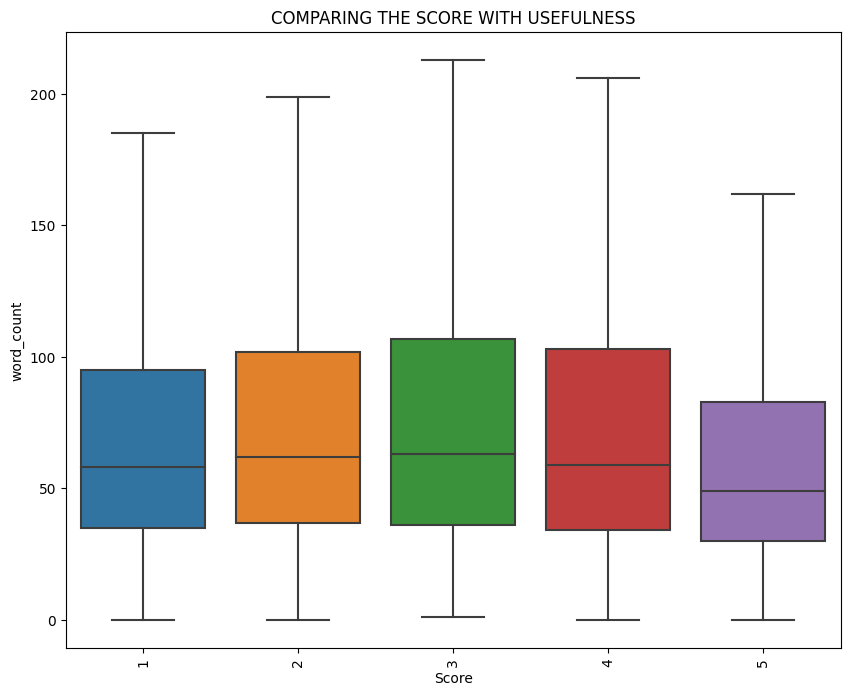

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Score',y='word_count',data=reviews,showfliers=False)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SCORE WITH USEFULNESS')
plt.show()

In [ ]:
#Dropping the unwanted columns from our data frame.
reviews.drop("ProductId", inplace=True, axis=1)
reviews.drop("ProfileName", inplace=True, axis=1)
reviews.drop("HelpfulnessNumerator", inplace=True, axis=1)
reviews.drop("HelpfulnessDenominator", inplace=True, axis=1)
reviews.drop("Time", inplace=True, axis=1)
reviews.drop("Sentiment", inplace=True, axis=1)
reviews.drop("usefulness", inplace=True, axis=1)
reviews.drop("word_count", inplace=True, axis=1)
reviews.head()

,UserId,Score,ReviewSummary,ReviewText
ID,,,,
0,AMATOIG271SMX,5,So Happy to find this vendor!!!,This is a fantastic deal!! My dogs love green...
1,A3OXHLG6DIBRW8,5,Great Spicy Snack - Highly Recommended,The Blue Diamond Jalapeno Smokehouse Almonds ...
2,A595T15OO91DC,5,It's about the caffeine!,"240 MG of caffeine, no sugar crash, no calori..."
3,A3DRH7AR0ZNOJ3,5,Delisious,A fantastic blend. Also tastes quite good bre...
4,A86BBGM0BWI3L,5,great if you can get it,This is the BEST coffee for the Keurig coffee...


In [ ]:
lst=[]
for i in reviews["Score"]:
    if i<3:
        lst.append(0)
    elif i>3:
        lst.append(1)
    else:
        lst.append(i)
reviews["Score"]=lst

In [ ]:
reviews.Score.unique()

array([1, 0, 3])

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews, test_size = 0.3)

In [ ]:
train.head()

,UserId,Score,ReviewSummary,ReviewText
ID,,,,
563101,A21NRX10U9Z06K,1,Best ever,These brownies are absolutely the best browni...
145530,A9MMHKFD4P0WH,1,Mum Mum's are the bomb!,"These ""cookies"" are the best for your little ..."
532744,A31RPHPK3GTR5M,0,Funny Aftertaste,I bought these knowing they probably wouldn't...
56950,A36ND028G9FTOC,1,Strong DecafTea!,"I like really strong tea, which is almost imp..."
291036,A32OS08EJEK03N,0,Not very good,"To each his own, but I did not care for his p..."


In [ ]:
# Removing all rows where 'Score' is equal to 3
train = train[train.Score != 3]
test = test[test.Score != 3]

In [ ]:
print(train.shape)
print(test.shape)

(367911, 4)
(157642, 4)


In [ ]:
lst_text = train['ReviewText'].tolist()
test_text = test['ReviewText'].tolist()

In [ ]:
#Converting the whole list to lower-case.
lst_text = [str(item).lower() for item in lst_text]
test_text = [str(item).lower() for item in test_text]

In [ ]:
import re
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

for i in tqdm(range(len(lst_text))):
    lst_text[i] = striphtml(lst_text[i])

100%|██████████| 367911/367911 [00:00<00:00, 580149.14it/s]


In [ ]:
for i in tqdm(range(len(test_text))):
    test_text[i] = striphtml(test_text[i])

100%|██████████| 157642/157642 [00:00<00:00, 317275.57it/s]


In [ ]:
for i in tqdm(range(len(lst_text))):
    lst_text[i] = re.sub(r'[^A-Za-z]+', ' ', lst_text[i])

100%|██████████| 367911/367911 [00:09<00:00, 38489.60it/s]


In [ ]:
for i in tqdm(range(len(lst_text))):
    lst_text[i] = re.sub(r'[^A-Za-z]+', ' ', lst_text[i])

100%|██████████| 367911/367911 [00:09<00:00, 38473.94it/s]


In [ ]:
for i in tqdm(range(len(test_text))):
    test_text[i] = re.sub(r'[^A-Za-z]+', ' ', test_text[i])

100%|██████████| 157642/157642 [00:03<00:00, 41397.62it/s]


In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
stemmed_test_text=[]
for val in tqdm(test_text):
    tokens = val.split()
    clean_tokens_test_text=[]
    for word in tokens:
        if word not in stopwords1:
            clean_tokens_test_text.append(str(stemmer.stem(word)))
    stemmed_test_text.append(' '.join(clean_tokens_test_text))

100%|██████████| 157642/157642 [02:07<00:00, 1237.70it/s]


In [ ]:
lemmatized_test_text=[]
for val in tqdm(test_text):
    tokens = val.split()
    clean_tokens_test_text1=[]
    for word in tokens:
        if word not in stopwords1:
            clean_tokens_test_text1.append(str(lemmatizer.lemmatize(word)))
    lemmatized_test_text.append(' '.join(clean_tokens_test_text1))

100%|██████████| 157642/157642 [00:26<00:00, 5926.63it/s]


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stemmed_train_text=[]
for val in tqdm(lst_text):
    tokens = val.split()
    clean_tokens_lst_text=[]
    for word in tokens:
        if word not in stopwords1:
            clean_tokens_lst_text.append(str(stemmer.stem(word)))
    stemmed_train_text.append(' '.join(clean_tokens_lst_text))

100%|██████████| 367911/367911 [04:51<00:00, 1260.56it/s]


In [ ]:
lemmatized_train_text=[]
for val in tqdm(lst_text):
    tokens = val.split()
    clean_tokens_lst_text=[]
    for word in tokens:
        if word not in stopwords1:
            clean_tokens_lst_text.append(str(lemmatizer.lemmatize(word)))
    lemmatized_train_text.append(' '.join(clean_tokens_lst_text))

100%|██████████| 367911/367911 [01:00<00:00, 6097.96it/s]


In [ ]:
X_train=pd.DataFrame({"stemmed_train_text":stemmed_train_text,"lemmatized_train_text":lemmatized_train_text})

In [ ]:
X_train.head()

,stemmed_train_text,lemmatized_train_text
0,browni absolut best browni tast sever occas re...,brownie absolutely best brownie tasted several...
1,cooki best littl one learn feed hand mouth abl...,cooky best little one learning feed hand mouth...
2,bought know probabl wouldn t great qualiti rig...,bought knowing probably wouldn t great quality...
3,realli strong tea almost imposs decaf tea best...,really strong tea almost impossible decaf tea ...
4,care product found end result dri found tast p...,care product found end result dry found taste ...


In [ ]:
X_test=pd.DataFrame({"stemmed_test_text":stemmed_test_text,"lemmatized_test_text":lemmatized_test_text})

In [ ]:
X_test

,stemmed_test_text,lemmatized_test_text
0,dog hate dont know flavor dog dont even eat tu...,dog hate dont know flavor dog dont even eat tu...
1,box arriv damag actual hole cardboard ship box...,box arrived damaged actual hole cardboard ship...
2,excel qualiti product deep full flavor rich in...,excellent quality product deep full flavored r...
3,receiv product last day rang promis go time gl...,received product last day range promised go ti...
4,don t know natur valley done made product self...,don t know nature valley done made product sel...
...,...,...
157637,ve drink teeccino year great stuff caffein muc...,ve drinking teeccino year great stuff caffeine...
157638,recent wen news write confer kentucki snack of...,recently wen news writing conference kentucky ...
157639,big fan healthi snack boy disappoint found bla...,big fan healthy snack boy disappointing found ...
157640,receiv tree coldest day januari box left outsi...,received tree coldest day january box left out...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()
X_train_bow = vocab.fit_transform(lemmatized_train_text)

In [ ]:
X_train_bow

<367911x83970 sparse matrix of type '<class 'numpy.int64'>'
	with 10760071 stored elements in Compressed Sparse Row format>

In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_bow = vocab.transform(lemmatized_test_text)
X_test_bow

<157642x83970 sparse matrix of type '<class 'numpy.int64'>'
	with 4574281 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, train.Score)

LogisticRegression()

In [ ]:
y_train_pred = classifier.predict(X_train_bow)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(train.Score, y_train_pred))

0.946848558482894


In [ ]:
y_test_pred = classifier.predict(X_test_bow)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(test.Score, y_test_pred))

0.9343639385442966


In [ ]:
print(classification_report(test.Score, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77     24636
           1       0.95      0.98      0.96    133006

    accuracy                           0.93    157642
   macro avg       0.90      0.84      0.87    157642
weighted avg       0.93      0.93      0.93    157642



In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train_bow, train.Score)

MultinomialNB()

In [ ]:
y_train_pred_class_nb = nb.predict(X_train_bow)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(train.Score, y_train_pred_class_nb)

0.9160720935226182

In [ ]:
# make class predictions for X_test_dtm
y_pred_class_nb = nb.predict(X_test_bow)

In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(test.Score, y_pred_class_nb)

0.9095418733586227

In [ ]:
con_metrics_nb = metrics.confusion_matrix(test.Score, y_pred_class_nb)
con_metrics_nb

array([[ 16954,   7682],
       [  6578, 126428]])

In [ ]:
print(metrics.classification_report(test.Score, y_pred_class_nb))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70     24636
           1       0.94      0.95      0.95    133006

    accuracy                           0.91    157642
   macro avg       0.83      0.82      0.83    157642
weighted avg       0.91      0.91      0.91    157642



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_bow, train.Score)

DecisionTreeClassifier()

In [ ]:
y_train_pred_class_nb = nb.predict(X_train_bow)

In [ ]:
metrics.accuracy_score(train.Score, y_train_pred_class_nb)

0.9160720935226182

In [ ]:
y_pred_class_nb = tree.predict(X_test_bow)

In [ ]:
y_pred_class_nb

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
metrics.accuracy_score(test.Score, y_pred_class_nb)

0.9082033975717131

In [ ]:
con_metrics_nb = metrics.confusion_matrix(test.Score, y_pred_class_nb)
con_metrics_nb

array([[ 16808,   7828],
       [  6643, 126363]])

In [ ]:
print(metrics.classification_report(test.Score, y_pred_class_nb))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70     24636
           1       0.94      0.95      0.95    133006

    accuracy                           0.91    157642
   macro avg       0.83      0.82      0.82    157642
weighted avg       0.91      0.91      0.91    157642



In [ ]:
import pickle

# Save the trained model to a file
with open('logistic_regression_model.pkl', 'wb') as file:
    classifier=pickle.dump(classifier, file)


In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Load the trained model from the file
with open('logistic_regression_model.pkl', 'rb') as file:
    classifier = pickle.load(file)

# Verify that the classifier loaded correctly
if classifier is None:
    print("The model was not loaded successfully. Please check the file path.")
else:
    # Example text for sentiment analysis
    text = "This product is really good and I'm satisfied with it."

    # Load the same vectorizer used during training
    with open('count_vectorizer.pkl', 'rb') as vectorizer_file:
        vectorizer = pickle.load(vectorizer_file)

    # Preprocess the text using the same vectorizer
    text_features = vectorizer.transform([text])

    # Make a prediction using the loaded model
    predicted_sentiment = classifier.predict(text_features)

    # Assuming that your model is binary (positive/negative sentiment)
    if predicted_sentiment[0] == 1:
        sentiment = "positive"
    else:
        sentiment = "negative"

    print(f"The sentiment of the text is {sentiment}")


The sentiment of the text is positive


In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Create and fit the CountVectorizer on your training data
vocab = CountVectorizer()
X_train_bow = vocab.fit_transform(lemmatized_train_text)

# Save the trained vectorizer and the feature matrix using pickle
with open('count_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vocab, vectorizer_file)

with open('X_train_bow.pkl', 'wb') as feature_matrix_file:
    pickle.dump(X_train_bow, feature_matrix_file)


In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Load the trained model from the file
with open('logistic_regression_model.pkl', 'rb') as file:
    classifier = pickle.load(file)

# Verify that the classifier loaded correctly
if classifier is None:
    print("The model was not loaded successfully. Please check the file path.")
else:
    # Example text for sentiment analysis
    text = "This product is best"

    # Load the same vectorizer used during training
    with open('count_vectorizer.pkl', 'rb') as vectorizer_file:
        vectorizer = pickle.load(vectorizer_file)

    # Preprocess the text using the same vectorizer
    text_features = vectorizer.transform([text])

    # Make a prediction using the loaded model
    predicted_sentiment = classifier.predict(text_features)

    # Assuming that your model is binary (positive/negative sentiment)
    if predicted_sentiment[0] == 1:
        sentiment = "positive"
    else:
        sentiment = "negative"

    print(f"The sentiment of the text is {sentiment}")

The sentiment of the text is positive
